# Hybrid Encryption

This lab shows the foundational mechanism behind secure communication:

- RSA -> protects small secrets (like AES keys).

- AES -> protects the actual data.

- Sockets -> move encrypted bytes across the network.

- Pickle -> bundles everything so both sides interpret the data correctly.

## It proves one thing:
Secure communication = correct cryptography + correct data transfer.

# Key Concepts (My Version)

### 1. Hybrid Encryption
  It combines both
  - AES (symmetric) - encrypts the actual message
  - RSA (Asymmetric) - encrypts the AES key (secure exchange)
  RSA is secure but slow, while AES is fast but it requires a shared key

### 2. AES Key
  Randomly generated for each message must remain secret.

### 3. IV (Initialization Vector)
  Random for each encryption
  Ensures to produce different ciphertexts for repeated messages
  Not secret, must be shared with the receiver

### 4. Public/Private Keys
  - Public Key - encrypt AES key (anyone can use it)
  - Private key - decrypt AES key (must be kept secret)

### 5. Socket Basics
  Data is sent as bytes may need chunking for large messages
  - socket.bind() -> where server listens
  - socket.listen() -> starts listening for connections
  - socket.accept() -> accepts incoming connections
  - socket.connect() -> client connects to the server
  Networking basics are simple: server listens, client connects and data flows
  Both sides (sender & receiver) must use UTF-8 or byte encoding.

### 6. Pickle/Serialization
  Python objects can't be sent raw over a network.
  - pickle.dumps() -> serialize tuple (encrypted_key, iv, encrypted_message)
  - pickle.loads() -> deserialize on the other side
  Always package all parts together, receiver unpacks them

### 7. AES CFB Mode (Cipher Feedback Mode)
  **Purpose**:
  It makes AES work like a stream cipher (can encrypt data of any length).
  
  **Working**:
  - It encrypts the previous ciphertext block (or IV for the first one) to create a keystream
  - The keystream is then XORed with the (first or next block in the sequence of) plaintext  to produce ciphertext.
  - Each cipher text block depends on the one before it

  **Advantages**:
  No padding needed, errors affect only one block, repeated messages look different (because of IV and chaining)

  **Result**:
  Secure, flexible, and produces unique ciphertexts even for identical plaintexts.

# Workflow of Hybrid Encryption

## Step 1: Key Generation:
Generate RSA key pair:
- Public Key -> public_key.pem
- Private Key -> private_key.pem

Done once per user/server

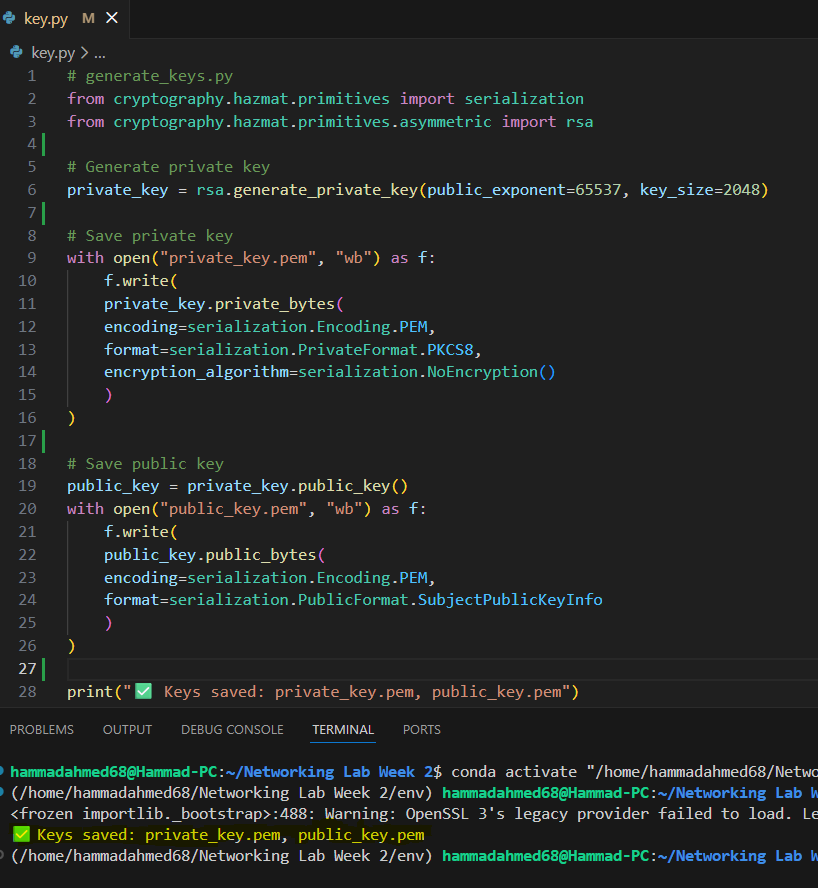

## Step 2 – Receiver (Server)
What the server does logically:

- Loads its private key.
- Starts a TCP server on port 65432.
- Waits for connection.
- Receives the full encrypted payload.
- Extracts (encrypted_key, iv, encrypted_message) using pickle.
- Uses RSA private key → decrypt AES key.
- Uses AES-CFB with IV → decrypts message.
- Prints the plaintext.

**The important security idea**:
Only the holder of the private key can decrypt the AES key, so only they can read the message.

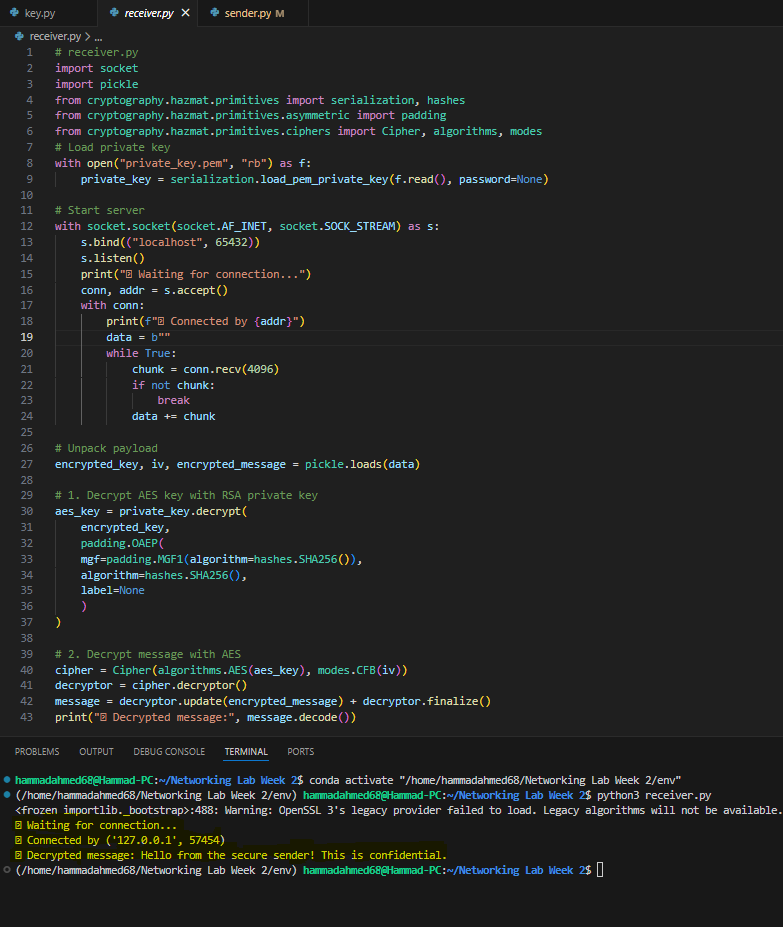

## Step 3 – Sender (Client)
What the sender does logically:

- Loads receiver’s public key.
- Prepares plaintext → converts to bytes.
- Generates fresh AES key + IV.
- AES-encrypts the message in CFB mode.
- RSA-encrypted the AES key.
- Packages everything via pickle.
- Sends to the server over TCP.

**Key Point**:
The sender DOES NOT need the private key. They only need the recipient’s public key.

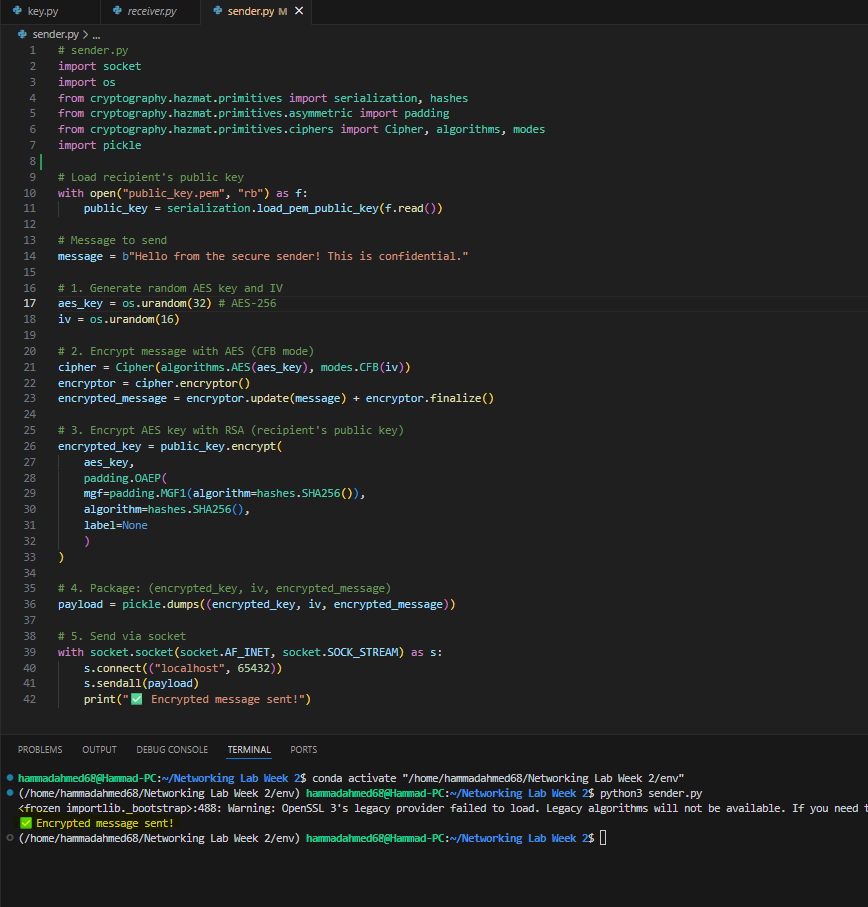

# Reflection

## Practical Summary (My Condensed Version)

**Sender Path**

Plaintext
- AES-encrypt with AES key + IV
- ciphertext
- package (RSA(AES key), IV, ciphertext)
- send via socket

**Receiver path**

Receive package
- RSA-decrypt AES key
- AES-decrypt ciphertext using AES key + IV
- recover plaintext

This is literally how secure messaging works (Signal, WhatsApp, TLS handshake, etc.).

## Conclusion
This lab is a minimal version of modern secure communication pipelines.

- RSA only protects the key.
- AES does the real encryption.
- IV prevents pattern leaks.
- Pickle ensures structured transfer.
- Sockets push bytes, nothing else.
- CFB removes padding problems and keeps ciphertext unique.